In [1]:
# Example data to insert
doc_id = "23456789021"
doc_name = "Harry Potter and the Deathly Hallows"

import psycopg2
import pandas as pd
from encode import SentenceModel, Chunkify

with open("HPDH_content.txt", 'r', encoding='utf-8') as file:
    text = file.read()

cf = Chunkify(chunk_size=100)
chunks = cf.chunkify(text=text)

document = pd.DataFrame({"id": [i+1 for i in range(0,len(chunks))], "paragraph": chunks})

model = SentenceModel()

document["encoding"] = document["paragraph"].apply(model.encode)

# Database connection
conn = psycopg2.connect(
    database="ragnotes",
    user="postgres",
    password="Pass@123",
    host="127.0.0.1",
    port=5432
)

cursor = conn.cursor()

try:
    # Insert into the 'documents' table (uncomment if needed)
    cursor.execute("truncate table documents;")
    cursor.execute("truncate table paragraphs;")
    cursor.execute("""
        INSERT INTO documents (doc_id, doc_name)
        VALUES (%s, %s)
    """, (doc_id, doc_name))

    # Insert into the 'paragraphs' table
    for _, row in document.iterrows():
        cursor.execute("""
            INSERT INTO paragraphs (doc_id, para_id, para_text, para_encodings)
            VALUES (%s, %s, %s, %s)
        """, (doc_id, row["id"], row["paragraph"], row["encoding"]))

    # Commit the transaction
    conn.commit()
    print("Data inserted successfully!")

except psycopg2.Error as e:
    # Print error message and rollback transaction
    print(f"Error inserting data: {e}")
    conn.rollback()

finally:
    # Close cursor and connection
    cursor.close()
    conn.close()


d:\Projects\RAGNotes\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Chunks Created!
Total Chunks  2760


Batches: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Data inserted successfully!


In [7]:
import psycopg2
from encode import SentenceModel

task = SentenceModel()

conn = psycopg2.connect(
        database="ragnotes",
        user="postgres",
        password="Pass@123",
        host="127.0.0.1",
        port=5432
    )

print(task.generate_augmented_prompt(query="What dumbledore plans with severus", connection=conn, doc_id="23456789021"))


Batches: 100%|██████████| 1/1 [00:00<00:00, 24.91it/s]


You are a helpful Assistant. Given the context below,
        Context Started

        Please.”</p> <p id="p" xml:lang="en-US" class="s">“And what will you give me in return, Severus?”</p> <p id="p" xml:lang="en-US" class="s">“In — in return?” Snape gaped at Dumbledore, and Harry expected him to protest, but after a long moment he said, “Anything.”</p> <p id="p" xml:lang="en-US" class="s">The hilltop faded, and Harry stood in Dumbledore’s office, and something was making a terrible sound, like a wounded animal. Snape was slumped forward in a chair and Dumbledore was standing over him, looking grim.. want your word!”</p> <p id="p" xml:lang="en-US" class="s">“My word, Severus, that shall never reveal the best of you?” Dumbledore sighed, looking down into Snape’s ferocious, anguished face. “If you insist . .”</p> <p id="p" xml:lang="en-US" class="s">The office dissolved but re-formed instantly. Snape was pacing up and down in front of Dumbledore.</p> <p id="p" xml:lang="en-US" class="s">“

Mean: 0.3342753480424321
Median: 0.3402261936799409
Standard Deviation: 0.08725828738699933
Minimum: -0.012579268594340665
Maximum: 0.6232394537245741


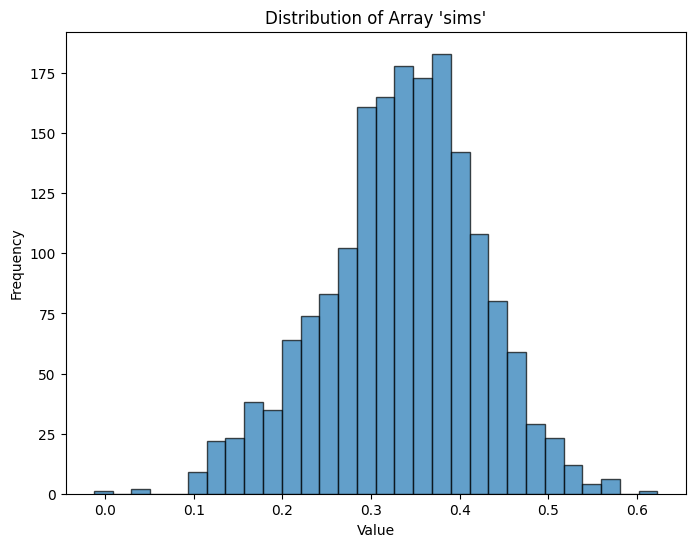

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating statistics
mean = np.mean(sims)
median = np.median(sims)
std_dev = np.std(sims)
min_value = np.min(sims)
max_value = np.max(sims)

# Printing the statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.hist(sims, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Array 'sims'")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


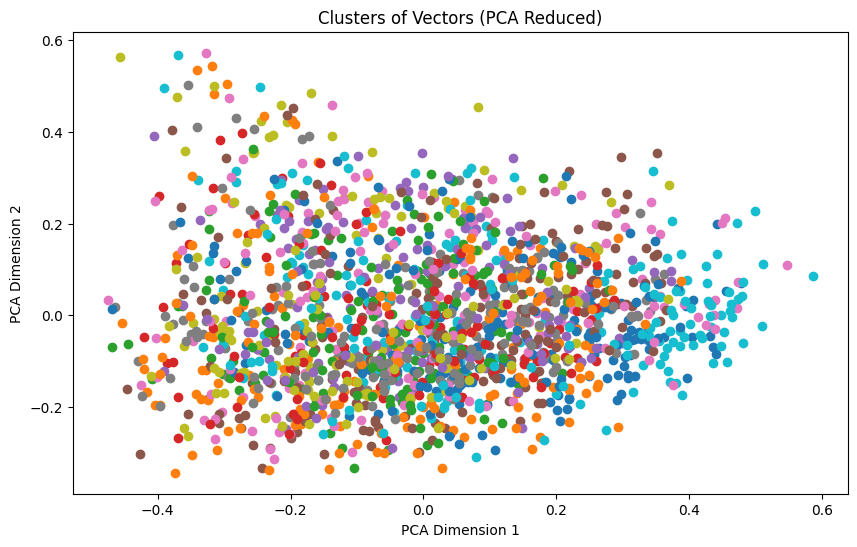

In [99]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your DataFrame (replace 'document.csv' with your file if needed)
# document = pd.read_csv('document.csv')

# Assuming your DataFrame is already loaded as 'document'
# Extracting vector encodings for clustering
vectors = pd.DataFrame(document['encoding'].tolist())

# Applying KMeans clustering
n_clusters = 180  # Adjust this based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
document['cluster'] = kmeans.fit_predict(vectors)

# Reducing dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_points = reduced_vectors[document['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Clusters of Vectors (PCA Reduced)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


0        53
1       121
2       268
3       247
4        39
       ... 
1772     73
1773    275
1774    121
1775    151
1776    210
Name: cluster, Length: 1777, dtype: int32

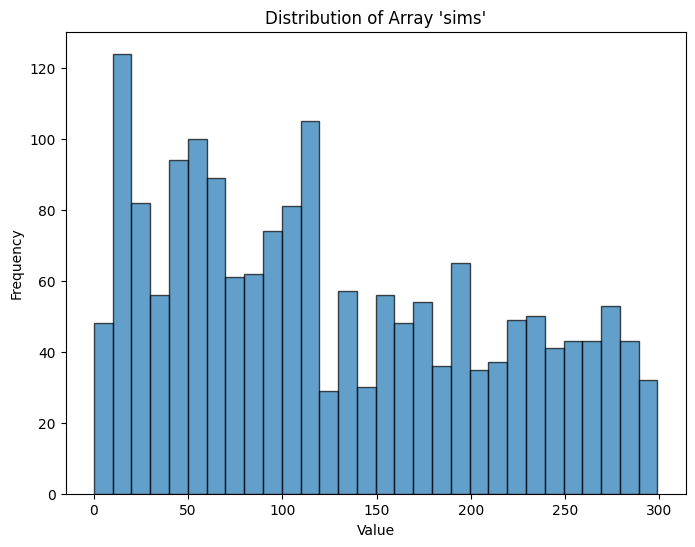

In [95]:
# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.hist(document["cluster"], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Array 'sims'")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

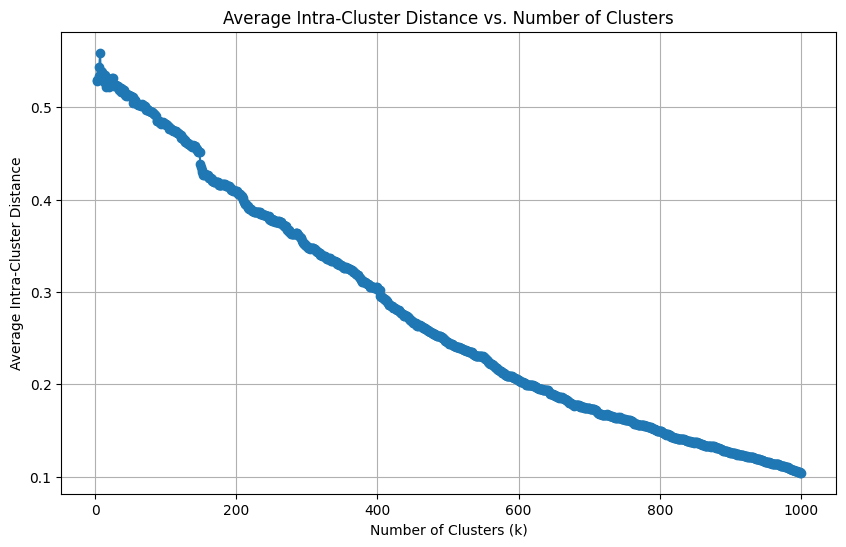

In [98]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

# Assuming 'vectors' is a DataFrame with vector encodings
# Function to calculate average intra-cluster distance for a given number of clusters
def calculate_avg_intra_cluster_distance(vectors, max_clusters=10):
    avg_distances = []
    cluster_counts = list(range(2, max_clusters + 1))

    for k in cluster_counts:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(vectors)
        _, distances = pairwise_distances_argmin_min(kmeans.cluster_centers_, vectors)
        avg_distance = distances.mean()
        avg_distances.append(avg_distance)

    return cluster_counts, avg_distances

# Calculate average intra-cluster distances
max_clusters = 1000  # Adjust based on your dataset
cluster_counts, avg_distances = calculate_avg_intra_cluster_distance(vectors, max_clusters)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, avg_distances, marker='o')
plt.title('Average Intra-Cluster Distance vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Intra-Cluster Distance')
plt.grid()
plt.show()
